# What can be represented on a map?

Several types of geographic data :  <br>
• Point <br>
• LineString <br>
• Polygon <br>
• others : LinearRing, MultiPolygon… <br>

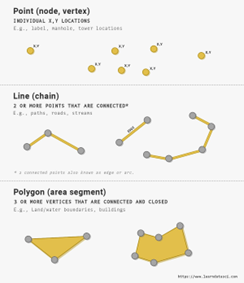 <br>

Several types of maps : <br>
• Points representation <br>
• Choropleth maps <br>

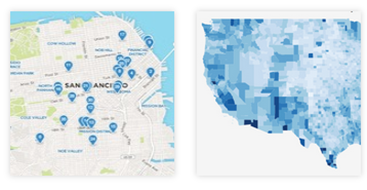

💡Read this article for more information : https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/

# Several libraries to analyse geographic data

• Shapely : manipulate and analyse geometric objects <br>
Documentation : https://shapely.readthedocs.io/en/stable/manual.html

• Geopandas : process (read...) geographic data <br>
Documentation : https://geopandas.org/en/v0.4.0/index.html

• Pyproj : manage geographic coordinate system <br>
Documentation : https://pyproj4.github.io/pyproj/stable/index.html

### Installing GeoPandas

To avoid common problems with geopandas installation, create a virtual environment. <br>

Follow : https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b <br>
until opening Jupyter. <br>

Reinstall packages not included like plotly.

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib
import plotly.express as px

import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

import geopandas as gpd

# Reading data

Different types of files can contain geographic data : geojson, shapefiles (.shp),... but also CSV or Excel.

In [2]:
df_data_nationales = pd.read_pickle('../data/Pickles/df_data_nationales.pkl')
df_eolien_norm = pd.read_pickle('../data/Pickles/df_eolien_norm.pkl')
df_solaire_norm = pd.read_pickle('../data/Pickles/df_solaire_norm.pkl')
df_temperatures = pd.read_pickle('../data/Pickles/df_temperatures.pkl')

### 1. Foisonnement de la production renouvelable en France :
idée 1 : Par région : Barplot de la production anuelle par région, stacked (solaire éolien)\
idée 2 : Évoluation (lineplot) au cours d'une année\
    - faire des courbes différente par région ou type d'énergie produite.

### 2. Thermo-sensibilité de la consommation :
idée 1 : Tracer deux lineplot évolution de la température dans le temps et évolution de la consommation dans le temps.
        (moyenné par journée)

idée optionelle : effet de la canicule sur la consommation

### 3. Mix énergétique en France :
Stacked plot

In [8]:
#input
# df_data_nationales = pd.read_pickle('../data/Pickles/df_data_nationales.pkl')
#Data Processing
#sampling and choosing features
df_energy_monthly = df_data_nationales.resample('ME').sum()
# df_energy_monthly = df_energy.set_index('DateTime').resample('ME').sum()
col_prod = ['Nucléaire','Hydraulique','Gaz','Eolien','Charbon','Bioénergies','Solaire','Fioul']
df_energy_monthly[col_prod]
#computing proportions
df_energy_monthly_total = df_energy_monthly[col_prod].sum(axis=1)
df_prop = pd.DataFrame(index = df_energy_monthly.index.copy())
for c in col_prod:
    df_prop[c] = df_energy_monthly[c]/df_energy_monthly_total*100

#ploting
import plotly.graph_objects as go

fig = go.Figure()
# for prod_src in col_prod.__reversed__():
for prod_src in col_prod:
    fig.add_trace(go.Scatter(
        x=df_energy_monthly.index,
        y=df_prop[prod_src],
        fill='tonexty',
        name=prod_src,
        stackgroup='one'
    ))

fig.update_layout(title='Proportions du mix Énergétique au cours du temps', xaxis_title='Temps', yaxis_title='proportion (en %)')
fig.show()


In [30]:
#input
# df_data_nationales = pd.read_pickle('../data/Pickles/df_data_nationales.pkl')
#Data Processing
#sampling and choosing features
df_energy_monthly = df_data_nationales.resample('ME').mean()
# df_energy_monthly = df_energy.set_index('DateTime').resample('ME').sum()
col_prod = ['Nucléaire','Hydraulique','Gaz','Eolien','Charbon','Bioénergies','Solaire','Fioul']
df_energy_monthly[col_prod]
#ploting
import plotly.graph_objects as go

fig = go.Figure()
# for prod_src in col_prod.__reversed__():
for prod_src in col_prod:
    fig.add_trace(go.Scatter(
        x=df_energy_monthly.index,
        y=df_energy_monthly[prod_src],
        fill='tonexty',
        name=prod_src,
        stackgroup='one'
    ))

fig.update_layout(title='Évolution temporelle de la moyenne mensuelle du mix de production Énergétique au cours du temps', xaxis_title='Temps', yaxis_title='MW (en %)')
fig.show()

In [ ]:
#heatmap
# df_solaire_norm.resample('ME').mean()

Périmètre,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,PACA,Pays-de-la-Loire
DateTime,,,,,,,,,,,,
2013-01-31,0.039008,0.018983,0.034275,0.030353,0.025050,0.017119,0.016200,0.022186,0.040703,0.049362,0.077068,0.034452
2013-02-28,0.065387,0.051228,0.071602,0.070363,0.052654,0.053339,0.047208,0.054463,0.081219,0.084914,0.103792,0.073622
2013-03-31,0.096770,0.086558,0.091617,0.100880,0.099795,0.081401,0.075419,0.070777,0.117592,0.109698,0.114392,0.097973
2013-04-30,0.115234,0.125591,0.150606,0.154037,0.144647,0.148400,0.128451,0.134887,0.146706,0.127843,0.134282,0.149821
2013-05-31,0.144362,0.130686,0.160175,0.156946,0.142856,0.144111,0.132994,0.138135,0.144204,0.153621,0.180832,0.156544
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.190083,0.191421,0.155079,0.194535,0.301174,0.158339,0.144577,0.159867,0.234212,0.205476,0.214451,0.184777
2018-09-30,0.178176,0.174869,0.149191,0.175428,0.285438,0.138399,0.129405,0.151679,0.208556,0.188534,0.199800,0.164789
2018-10-31,0.121426,0.121107,0.112366,0.125007,0.239958,0.110953,0.112292,0.115064,0.132951,0.115389,0.123278,0.117662


### SUITE NOTEBOOK

In [ ]:
#Read French areas data (regions-20140306-100m.shp) with geopandas.read_file
regions = gpd.read_file("../data/regions/regions-20140306-100m.shp")

In [ ]:
regions.head()

,code_insee,nom,nom_cl,insee_cl,nuts2,iso3166_2,wikipedia,nb_dep,nb_comm,surf_km2,geometry
0,42,Alsace,Strasbourg,67482,FR42,None,fr:Alsace,2,904,8328.0,"POLYGON ((7.43003 47.45949, 7.4288 47.45388, 7..."
1,72,Aquitaine,Bordeaux,33063,FR61,None,fr:Aquitaine,5,2296,41818.0,"MULTIPOLYGON (((-1.75633 43.38372, -1.7559 43...."
2,83,Auvergne,Clermont-Ferrand,63113,FR72,None,fr:Auvergne,4,1310,26172.0,"POLYGON ((3.3369 44.95609, 3.31531 44.94425, 3..."
3,25,Basse-Normandie,Caen,14118,FR25,None,fr:Basse-Normandie,3,1812,17786.0,"MULTIPOLYGON (((-1.51504 48.66027, -1.51304 48..."
4,26,Bourgogne,Dijon,21231,FR26,None,fr:Bourgogne,4,2046,31752.0,"POLYGON ((4.76293 46.17583, 4.75864 46.17205, ..."


In [ ]:
type(regions)

geopandas.geodataframe.GeoDataFrame

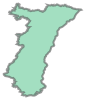

In [ ]:
regions.geometry.iloc[0]

In [ ]:
#Read energy production data (installations-production-elec-gaz.csv)
df_energy_prod = pd.read_csv("../data/installations-production-elec-gaz.csv",sep=";")

In [ ]:
df_energy_prod.head()

,1_f_commune_pdl,count,date_des_donnees,code_epci,s_3_prod_i_regime_d_exploitation,s_3_prod_d_filiere,coordonnees,1_f_code_insee_pdl
0,Mazan,1,2020-03,248400053,NaN,Éolien,"44.0545320098, 5.13048600927",84072
1,Mazangé,14,2020-03,200072072,Realised,Solaire,"47.8402255423, 0.948834044312",41131
2,Mazaugues,26,2020-03,200068104,Realised,Solaire,"43.3448761166, 5.89589582308",83076
3,Mazerat-Aurouze,1,2020-03,200073393,Realised,Hydraulique,"45.1875462661, 3.5663385327",43131
4,Mazeray,4,2020-03,200041689,NaN,Solaire,"45.9158199464, -0.559708232455",17226


In [ ]:
type(df_energy_prod)

pandas.core.frame.DataFrame

<br>
When we import data with geopandas, Python reads them like geographic data, but for CSV, coordinates are strings. We have to convert the column "coordonnees" to get a geometric object.

In [ ]:
# Create a column "geometry" that looks like : 'POINT (latitude longitude)'
def coord_to_point(coord):
    if pd.isna(coord):
        return None
    lat,lon = map(float, coord.split(','))
    return Point(lon,lat)

df_energy_prod['geometry'] = df_energy_prod['coordonnees'].apply(coord_to_point)

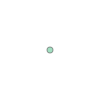

In [ ]:
df_energy_prod['geometry'].iloc[0]

In [ ]:
type(df_energy_prod)

pandas.core.frame.DataFrame

In [ ]:
# Convert df_energy_prod to GeoDataFrame
df_energy_prod = gpd.GeoDataFrame(df_energy_prod)

In [ ]:
type(df_energy_prod)

geopandas.geodataframe.GeoDataFrame

# Visualising data statically

With .plot(), we can view maps statically :

<Axes: >

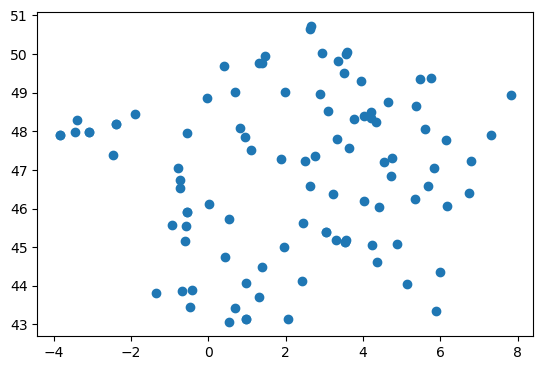

In [ ]:
# Visualise df_energy_prod 
df_energy_prod.iloc[0:100].plot()

<Axes: >

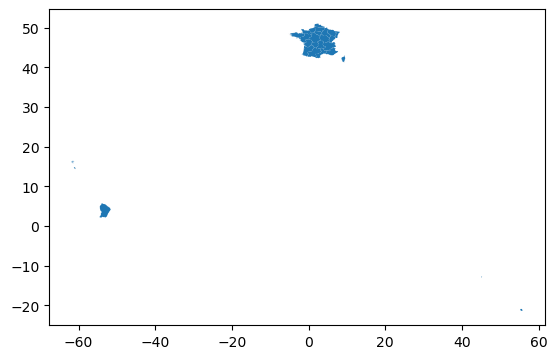

In [ ]:
#Visualise regions
regions.plot()

# Visualising maps interactively

We'll use Plotly Express functions, one for points and one for polygons

In [ ]:
# First 1000 points
fig = px.scatter_mapbox(df_energy_prod.iloc[0:1000],
                        lat=df_energy_prod['geometry'].iloc[0:1000].y, lon=df_energy_prod['geometry'].iloc[0:1000].x, 
                        mapbox_style="carto-positron", #fond de carte
                        zoom=6, center = {"lat": 46, "lon": 4}) #positionnement par défaut de la carte
                        
fig.show()

/tmp/ipykernel_7798/1446831271.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.choropleth_mapbox(regions, geojson = regions["geometry"],
                          locations = regions.index,
                          mapbox_style="carto-positron",
                          zoom=3, center = {"lat": 47, "lon": 4})
fig.show()

💡 Several libraries can be used to create maps : <br>
Interactive: Plotly, Folium, Mplleaflet… <br>
Static: Basemap, Cartopy… <br>

You can compare on : https://github.com/ispmarin/maps and with the libraries documentation.

# Bonus

With Plotly documentation (https://plotly.com/python/maps/), improve the maps : 
- color the points according to the energy source
- change mapbox style
- customise the hovertemplate
- ...